In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the directories
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import StratifiedKFold
#from sklearn.cross_validation import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#inspect the data
card = pd.read_csv("creditcard.csv")
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
card.shape

(214964, 31)

In [5]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,214964.000000,214964.000000,214964.000000,214964.000000,214964.000000,214964.000000,214964.000000,214964.000000,214964.000000,214963.000000,...,214963.000000,214963.000000,214963.000000,214963.000000,214963.000000,214963.000000,214963.000000,214963.000000,214963.00000,214963.000000
mean,75237.290672,-0.080266,-0.005839,0.242078,0.057069,-0.082524,0.038793,-0.036145,0.009207,0.005466,...,-0.009762,-0.033112,-0.012608,0.002411,0.047643,0.004083,0.000394,0.001870,90.21814,0.001861
std,37388.958644,1.914979,1.635770,1.471010,1.405852,1.364554,1.316513,1.219111,1.205234,1.129192,...,0.739693,0.701113,0.618168,0.604747,0.501151,0.487505,0.398043,0.326422,248.50579,0.043097
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.00000,0.000000
25%,46124.000000,-0.953255,-0.591572,-0.469335,-0.811304,-0.763707,-0.721565,-0.571531,-0.189327,-0.662752,...,-0.226086,-0.534440,-0.167940,-0.346178,-0.259684,-0.331269,-0.068681,-0.045454,6.00000,0.000000
50%,70453.500000,-0.055316,0.074387,0.425372,0.057796,-0.142398,-0.228284,0.001725,0.037369,-0.070160,...,-0.038361,-0.021244,-0.025748,0.049814,0.088024,-0.061591,0.004538,0.017087,23.19000,0.000000
75%,114001.500000,1.230239,0.781391,1.182759,0.858258,0.505428,0.439606,0.520545,0.334425,0.619100,...,0.161068,0.451358,0.121669,0.424873,0.378433,0.256743,0.089017,0.078029,79.80000,0.000000
max,139883.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.53000,1.000000


Fraudulent Cases: 400
Valid Transactions: 214563
Proportion of Fraudulent Cases: 0.0018607766881896504


<Axes: ylabel=' '>

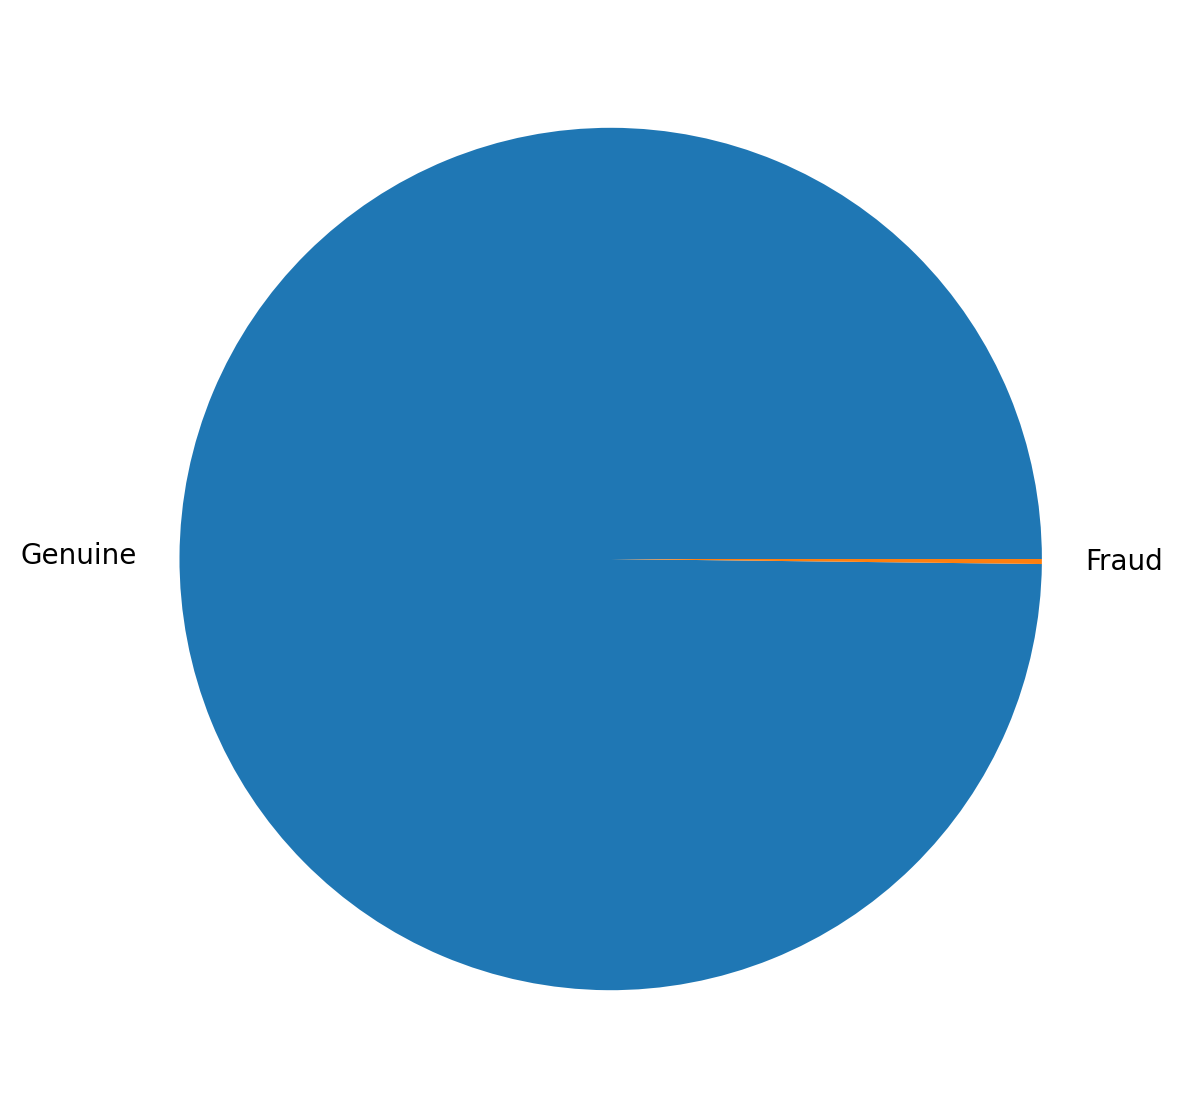

In [6]:
# check for relative proportion 
print("Fraudulent Cases: " + str(len(card[card["Class"] == 1])))
print("Valid Transactions: " + str(len(card[card["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(card[card["Class"] == 1])/ card.shape[0]))

# To see how small are the number of Fraud transactions
data_p = card.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

In [7]:
# first 5 rows of the dataset
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
# last 5 rows of the dataset
card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214959,139882.0,-0.679832,-4.801609,-4.412276,0.345015,-0.666280,-1.115426,2.907259,-1.035646,0.182834,...,1.149672,0.109102,-1.479700,0.878630,0.118207,0.882984,-0.435826,0.165527,1500.0,0.0
214960,139883.0,2.235620,-1.788314,-2.211893,-2.295045,1.078513,3.828149,-1.691041,0.908046,-0.861632,...,-0.523521,-0.882433,0.344744,0.678930,-0.132457,-0.302200,0.041595,-0.058157,23.0,0.0
214961,139883.0,-2.782387,0.002524,-0.832907,-1.677913,-0.669107,0.152084,0.111793,1.150770,-1.906688,...,0.116542,0.163962,-0.717237,0.165941,1.121455,-0.029357,-0.517849,-0.364061,160.0,0.0
214962,139883.0,-0.831139,-0.910039,0.557436,-1.867417,-1.635921,0.588910,0.512907,-0.352906,-1.926542,...,-0.199638,0.313353,0.135378,0.628179,-0.324842,-0.046221,0.018321,0.149308,270.0,0.0
214963,139883.0,-1.357257,0.180432,0.875156,-0.305253,0.576101,-0.026724,0.560755,-0.074989,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


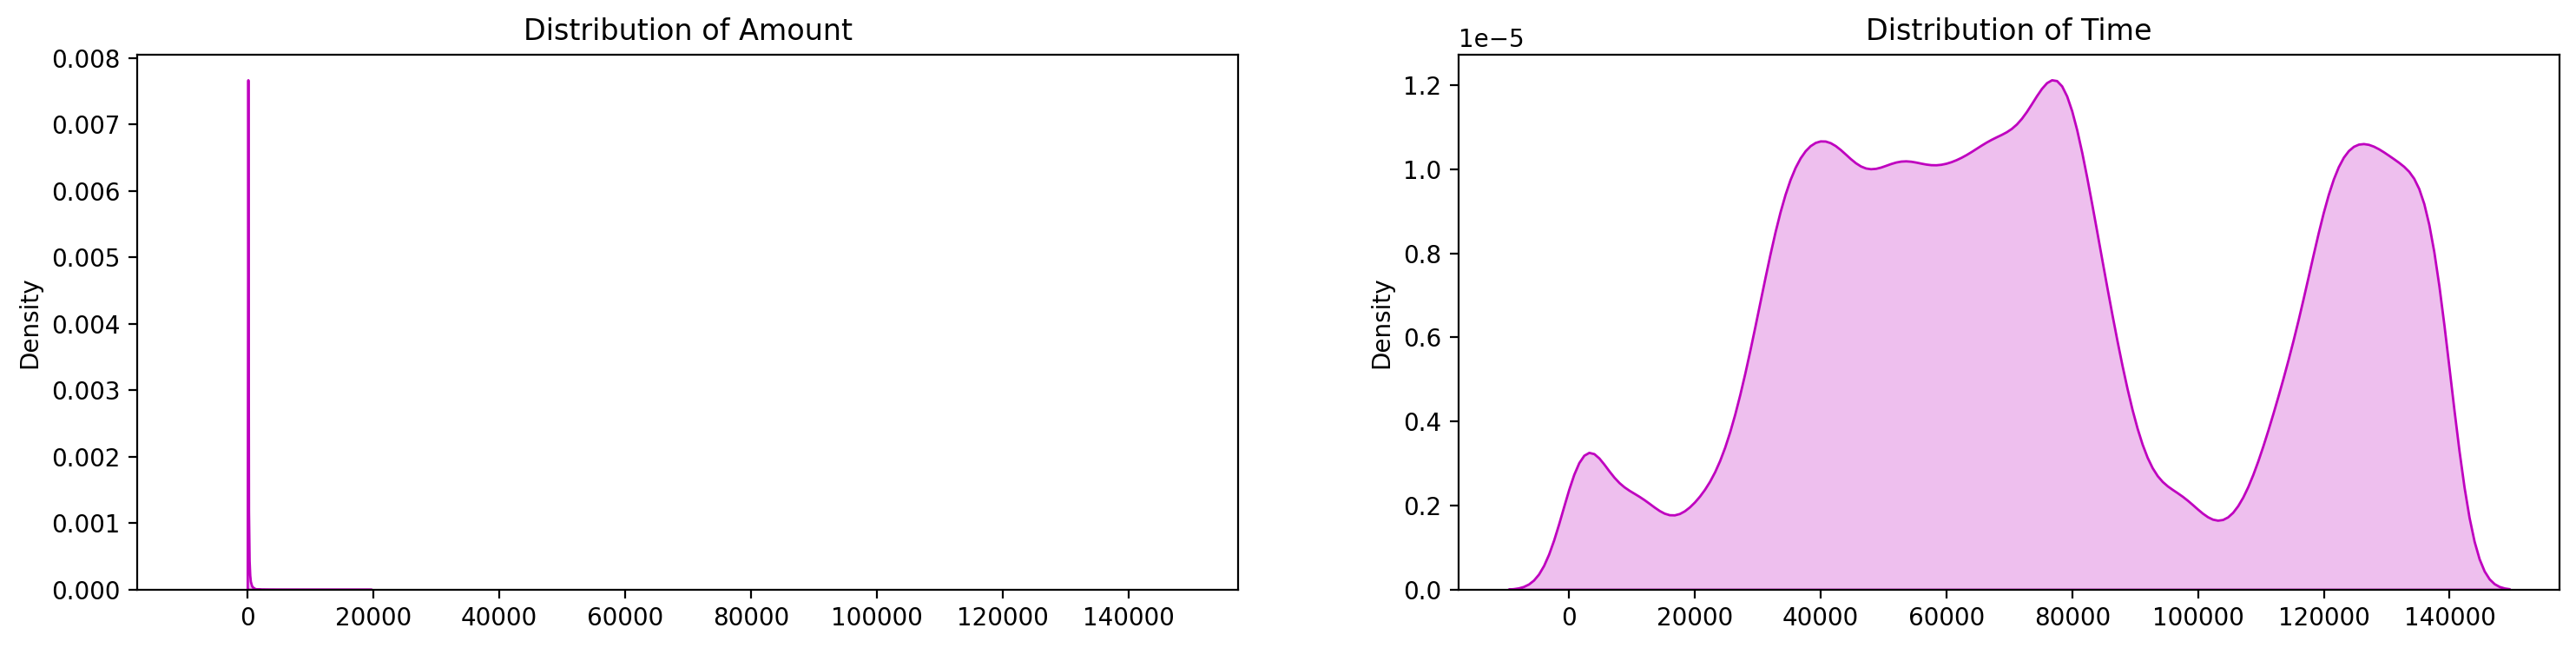

In [9]:
# plot the named features 
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_value = card['Amount'].values # values
time_value = card['Time'].values # values

sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Time')

plt.show()

In [10]:
# dataset informations
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214964 entries, 0 to 214963
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    214964 non-null  float64
 1   V1      214964 non-null  float64
 2   V2      214964 non-null  float64
 3   V3      214964 non-null  float64
 4   V4      214964 non-null  float64
 5   V5      214964 non-null  float64
 6   V6      214964 non-null  float64
 7   V7      214964 non-null  float64
 8   V8      214964 non-null  float64
 9   V9      214963 non-null  float64
 10  V10     214963 non-null  float64
 11  V11     214963 non-null  float64
 12  V12     214963 non-null  float64
 13  V13     214963 non-null  float64
 14  V14     214963 non-null  float64
 15  V15     214963 non-null  float64
 16  V16     214963 non-null  float64
 17  V17     214963 non-null  float64
 18  V18     214963 non-null  float64
 19  V19     214963 non-null  float64
 20  V20     214963 non-null  float64
 21  V21     21

In [11]:
# Cheking missing values in columns
card_missing_values = card.isnull().sum()
card_missing_values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [12]:
classes = card['Class'].value_counts()
classes

0.0    214563
1.0       400
Name: Class, dtype: int64

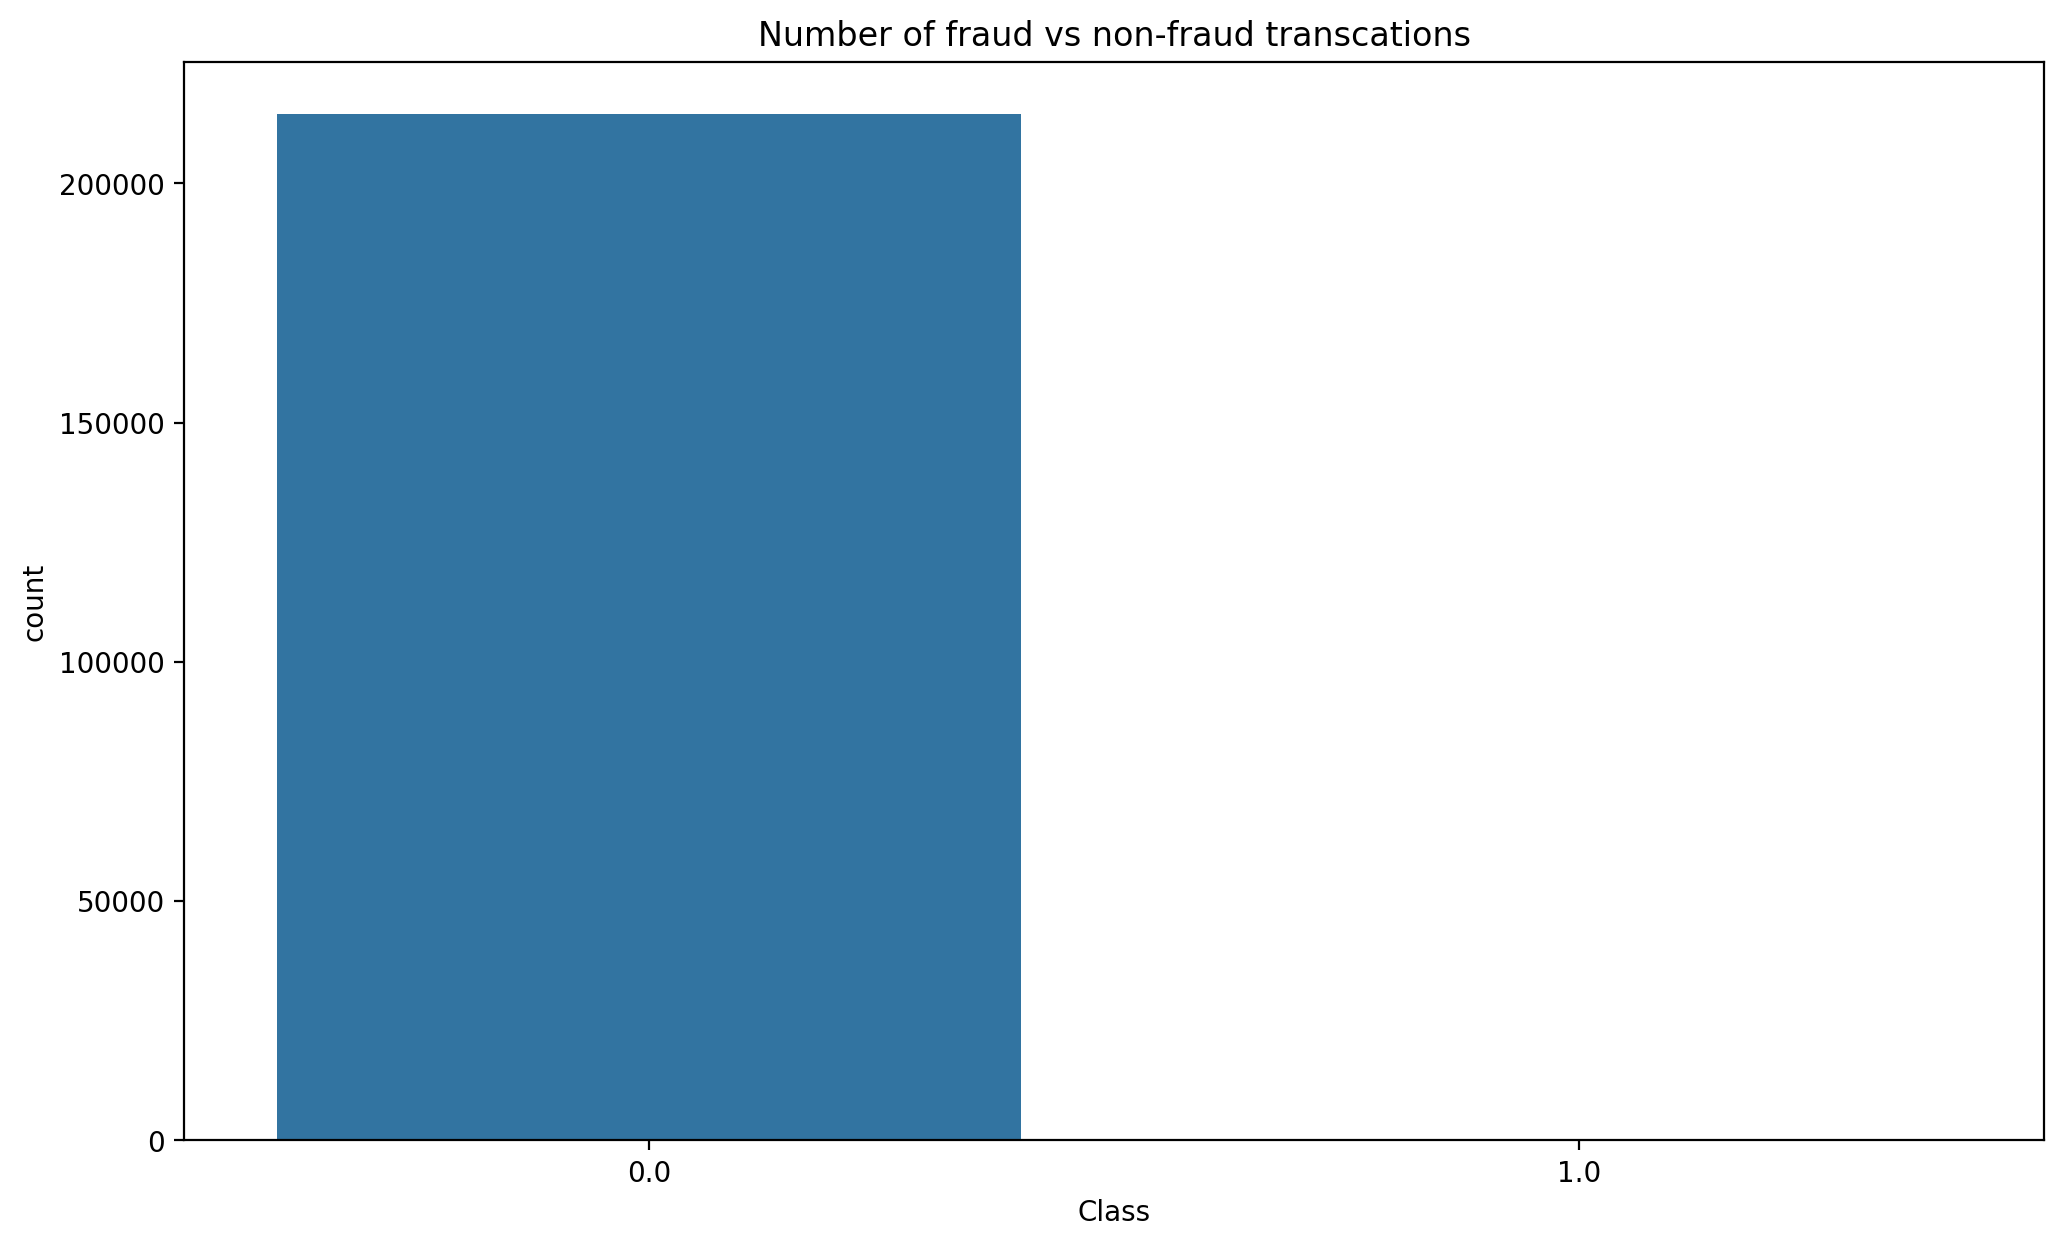

In [13]:
sns.countplot(x='Class', data=card)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

In [14]:
# Creating fraud dataframe
data_fraud = card[card['Class'] == 1]
# Creating non fraud dataframe
data_non_fraud = card[card['Class'] == 0]


In [15]:
print("Average Amount in a Fraudulent Transaction: " + str(card[card["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(card[card["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 123.52517499999998
Average Amount in a Valid Transaction: 90.15604675549838


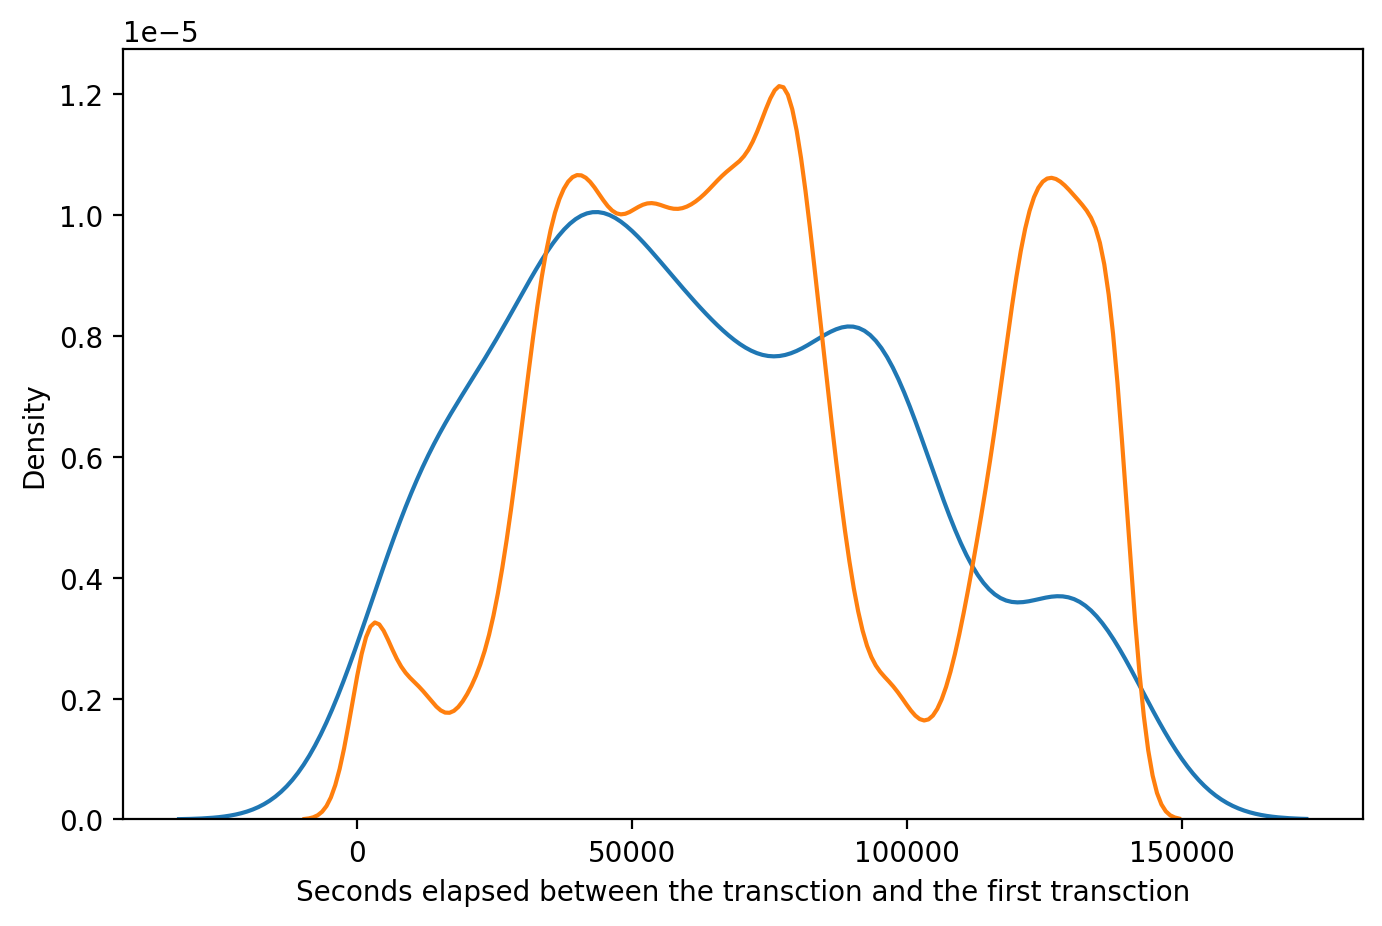

In [16]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudt',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraud',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [17]:
# Dropping the Time column
card.drop('Time', axis=1, inplace=True)

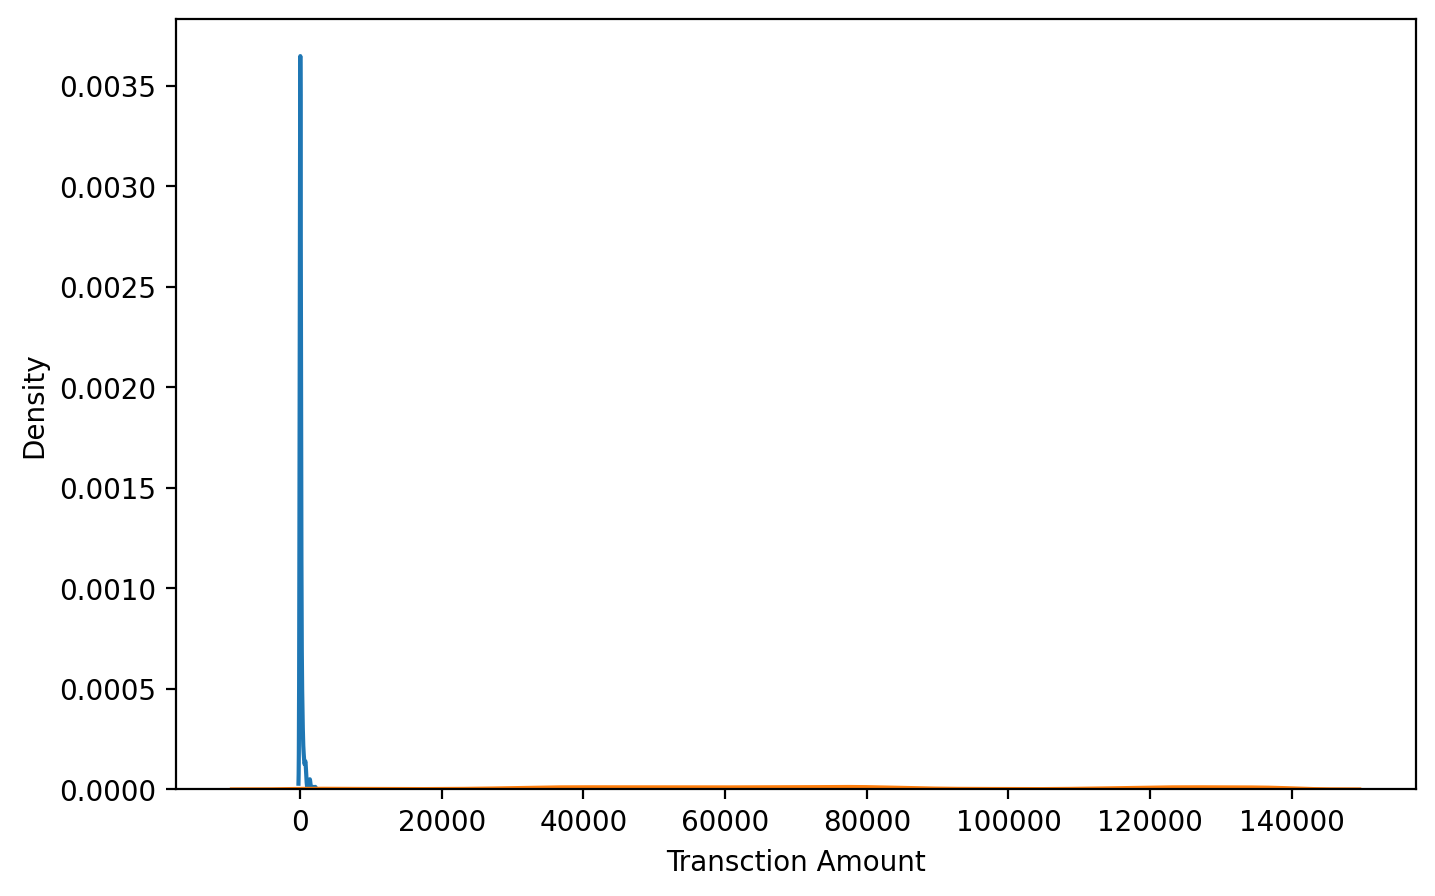

In [18]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

In [19]:
# Import library
from sklearn.model_selection import train_test_split

In [20]:
# Putting feature variables into X
X = card.drop(['Class'], axis=1)

In [21]:
# Putting target variable to y
y = card['Class']

In [22]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=100)

In [23]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [24]:
# Instantiate the Scaler
scaler = StandardScaler()

In [25]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [26]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
66411,-0.889571,1.255813,1.847043,1.470904,0.551440,-0.358154,0.715777,-0.000948,-1.126257,0.255007,...,-0.294329,-0.056033,-0.329280,0.071042,0.352077,-0.667402,-0.495653,-0.119130,0.163150,-0.357123
205442,2.056300,-0.921115,-1.951747,-0.837966,0.198043,0.080166,-0.237550,-0.164449,-0.931724,1.084498,...,-0.306302,-0.113385,0.008711,-0.070044,-0.299009,0.062590,0.789804,-0.088561,-0.061862,0.039876
87206,-0.690609,1.038702,-0.391744,-1.173390,2.151749,3.307468,-0.249657,1.365386,-0.688294,-0.470744,...,0.102580,-0.241316,-0.914446,-0.008879,0.982777,-0.012738,0.088952,0.143146,0.050991,-0.362363
210416,1.949956,-0.472564,-0.295024,0.458806,-0.588352,0.024048,-0.755517,0.136409,0.993384,0.191780,...,-0.182722,0.205453,0.794443,0.109241,-0.345786,-0.242086,0.393094,-0.006039,-0.057745,-0.323187
147049,0.127699,0.984483,-0.525287,-0.741196,1.159804,-0.316518,0.862076,0.053542,-0.298162,-0.665839,...,0.045581,-0.312607,-0.778798,0.034824,0.179838,-0.400891,0.116321,0.219223,0.070818,-0.358252


In [27]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
170086,0.232010,-0.795545,0.477942,-2.592957,-0.878584,-0.093301,-0.064004,-0.061218,-2.172103,0.945684,...,-0.136938,-0.002593,0.309541,0.143074,-0.509969,-0.405217,-0.247321,0.063948,0.040585,0.050920
97915,-0.526388,0.854002,1.518242,1.004338,0.609383,0.569262,0.814703,-0.103515,0.091190,0.828519,...,0.367369,-0.150610,0.278133,-0.255604,-0.309995,-0.103910,-0.269576,0.197619,-0.181552,-0.305735
102130,0.065919,-0.872226,2.214510,-2.126725,-1.462050,-0.428979,-0.714587,-0.095072,-1.178939,0.914856,...,-0.345537,-0.197757,0.071625,0.015595,0.352629,-0.455237,-0.440530,-0.055444,-0.168415,-0.303800
148633,1.942382,-0.522871,-0.218608,0.497250,-0.605545,0.216448,-1.025009,0.216530,2.516906,-0.163349,...,-0.300101,0.047207,0.458041,0.227490,0.657071,-0.389284,0.484869,-0.062182,-0.059616,-0.317101
88240,1.188870,-1.432918,1.169790,-0.482474,-1.311549,1.725206,-1.782845,0.627516,0.756139,0.314330,...,0.126353,0.141854,0.706092,-0.274391,-1.077822,0.532713,0.052371,0.091530,0.010130,-0.126380


In [28]:
# Separate response and features  Undersampling before cross validation will lead to overfiting
y = card["Class"] # target 
X = card.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171971, 30), (42993, 30), (171971,), (42993,))

In [29]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [30]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

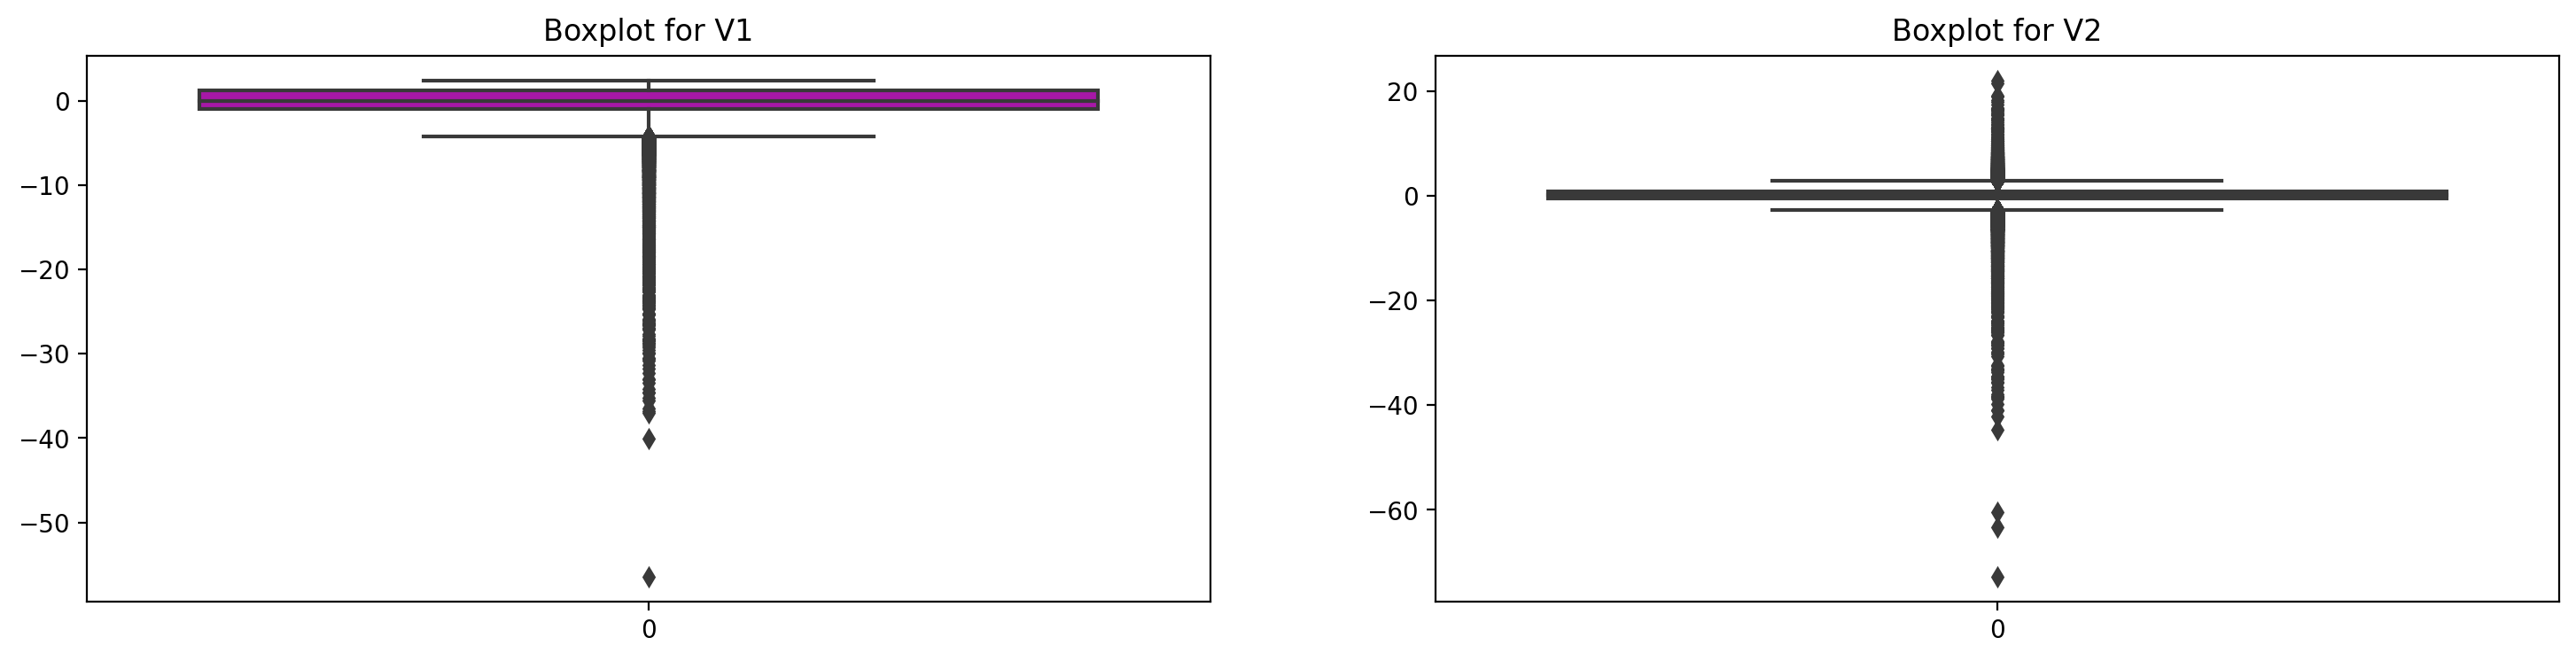

In [31]:
# boxplot for two example variables in the dataset

f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = card["V1"]
variable2 = card["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

In [32]:
# Find the IQR for all the feature variables
# Please note that we are keeping Class variable also in this evaluation, though we know using this method no observation
# be removed based on this variable.

quartile1 = card.quantile(0.25)
quartile3 = card.quantile(0.75)

IQR = quartile3 - quartile1
print(IQR)

V1         2.183494
V2         1.372963
V3         1.652094
V4         1.669562
V5         1.269134
V6         1.161172
V7         1.092077
V8         0.523753
V9         1.281852
V10        0.971996
V11        1.526683
V12        1.075722
V13        1.342150
V14        0.888310
V15        1.274583
V16        1.007307
V17        0.865194
V18        0.985788
V19        0.951494
V20        0.346389
V21        0.387154
V22        0.985799
V23        0.289609
V24        0.771051
V25        0.638118
V26        0.588011
V27        0.157698
V28        0.123483
Amount    73.800000
Class      0.000000
dtype: float64


In [33]:
# separating the data for analysis
legit = card[card.Class == 0]
fraud = card[card.Class == 1]

In [34]:
print(legit.shape)
print(fraud.shape)

(214563, 30)
(400, 30)


In [35]:
# statistical measures of the data
legit.Amount.describe()

count    214563.000000
mean         90.156047
std         248.486219
min           0.000000
25%           6.000000
50%          23.200000
75%          79.640000
max       19656.530000
Name: Amount, dtype: float64

In [36]:
fraud.Amount.describe()

count     400.000000
mean      123.525175
std       256.955745
min         0.000000
25%         1.000000
50%        13.385000
75%       105.915000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
# compare the values for both transactions 
card.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.070135,-0.013457,0.256683,0.048412,-0.075352,0.041439,-0.024219,0.007990,0.010551,0.006155,...,0.013462,-0.011231,-0.033183,-0.012548,0.002553,0.047621,0.004014,0.000045,0.001751,90.156047
1.0,-5.511187,4.080075,-7.593948,4.701688,-3.931473,-1.380231,-6.434906,0.662453,-2.722268,-6.244648,...,0.388246,0.778418,0.004811,-0.045227,-0.073692,0.059757,0.041249,0.187905,0.065529,123.525175
